In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/mobile.csv")

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df.head


<bound method NDFrame.head of       battery_power  bluetooth  clock_speed  dual_sim  frontcamerapixel  4G  \
0               842          0          2.2         0                 1   0   
1              1021          1          0.5         1                 0   1   
2               563          1          0.5         1                 2   1   
3               615          1          2.5         0                 0   0   
4              1821          1          1.2         0                13   1   
...             ...        ...          ...       ...               ...  ..   
1995            794          1          0.5         1                 0   1   
1996           1965          1          2.6         1                 0   0   
1997           1911          0          0.9         1                 1   1   
1998           1512          0          0.9         0                 4   1   
1999            510          1          2.0         1                 5   1   

      memorysize  wei

In [ ]:
x=df.drop("price_range",axis=1)
y=df["price_range"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
X_train.shape

(1400, 19)

In [ ]:
X_test.shape

(600, 19)



*   List item
*   List item



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model=keras.Sequential()
model.add(keras.layers.Dense(64,activation="relu",
                               input_shape=(X_train.shape[1],))) #input layer
model.add(keras.layers.Dense(32,activation="relu")) #second
model.add(keras.layers.Dense(1,activation="softmax")) #output

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                1280      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Category model not working
#model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")
#model.fit(X_train,y_train,epochs=5)
#model.summary()

###working continious model
from sklearn import model_selection
model.compile(optimizer="adam",loss="mean_squared_error",metrics="mse")
#learning
history=model.fit(X_train,y_train,epochs=200)
model.summary()


Epoch 1/200
44/44 [==============================] - 1s 2ms/step - loss: 1.4721 - mse: 1.4721
Epoch 2/200
44/44 [==============================] - 0s 2ms/step - loss: 1.4721 - mse: 1.4721
Epoch 3/200
44/44 [==============================] - 0s 2ms/step - loss: 1.4721 - mse: 1.4721
Epoch 4/200
44/44 [==============================] - 0s 2ms/step - loss: 1.4721 - mse: 1.4721
Epoch 5/200
44/44 [==============================] - 0s 2ms/step - loss: 1.4721 - mse: 1.4721
Epoch 6/200
44/44 [==============================] - 0s 3ms/step - loss: 1.4721 - mse: 1.4721
Epoch 7/200
44/44 [==============================] - 0s 2ms/step - loss: 1.4721 - mse: 1.4721
Epoch 8/200
44/44 [==============================] - 0s 2ms/step - loss: 1.4721 - mse: 1.4721
Epoch 9/200
44/44 [==============================] - 0s 2ms/step - loss: 1.4721 - mse: 1.4721
Epoch 10/200
44/44 [==============================] - 0s 2ms/step - loss: 1.4721 - mse: 1.4721
Epoch 11/200
44/44 [==============================] - 0s 2m

In [ ]:
loss, mse=model.evaluate(X_test,y_test)
print("MSE: ",mse)

19/19 [==============================] - 0s 2ms/step - loss: 0.1748 - mse: 0.1748
MSE:  0.17483879625797272


In [ ]:
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)

19/19 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import r2_score
print("R^2 Score:", r2_score(y_train,y_train_predict))
print(r2_score(y_test,y_test_predict))

R^2 Score: 0.9989270091008957
0.8595267973675221


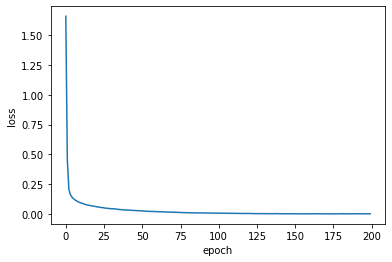

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()


In [ ]:
train_new=X_train.reshape(-1,19)
test_new=X_test.reshape(-1,19)

model2=keras.Sequential()
model2.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(19,1)))
model2.add(keras.layers.MaxPooling1D(pool_size=2, strides = 1))

In [ ]:
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(784, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))


In [ ]:
model2.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
              metrics="accuracy")

In [ ]:
history2=model.fit(train_new,y_train,epochs=5)

Epoch 1/5
44/44 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011
Epoch 2/5
44/44 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020
Epoch 3/5
44/44 [==============================] - 0s 2ms/step - loss: 0.0017 - mse: 0.0017
Epoch 4/5
44/44 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018
Epoch 5/5
44/44 [==============================] - 0s 2ms/step - loss: 0.0017 - mse: 0.0017


In [ ]:
df2=pd.read_csv("/content/mobile2.csv")
x2=df2.drop("price_range",axis=1)
y2=df2["price_range"]

In [ ]:
sc2=StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)



In [ ]:
model=keras.Sequential()
model.add(tf.keras.layers.Dense(64,activation="relu",
                               input_shape=(X_train.shape[1],))) #input layer
model.add(tf.keras.layers.Dense(32,activation="relu")) #second
model.add(tf.keras.layers.Dense(1,activation="linear")) #output

In [ ]:
from sklearn import model_selection
model.compile(optimizer="adam",loss="mean_squared_error",metrics="mse")
#learning
history=model.fit(X_train2,y_train,epochs=200)
model.summary()

Epoch 1/200
44/44 [==============================] - 1s 2ms/step - loss: 1.3150 - mse: 1.3150
Epoch 2/200
44/44 [==============================] - 0s 2ms/step - loss: 0.3901 - mse: 0.3901
Epoch 3/200
44/44 [==============================] - 0s 2ms/step - loss: 0.2035 - mse: 0.2035
Epoch 4/200
44/44 [==============================] - 0s 2ms/step - loss: 0.1641 - mse: 0.1641
Epoch 5/200
44/44 [==============================] - 0s 2ms/step - loss: 0.1426 - mse: 0.1426
Epoch 6/200
44/44 [==============================] - 0s 2ms/step - loss: 0.1278 - mse: 0.1278
Epoch 7/200
44/44 [==============================] - 0s 2ms/step - loss: 0.1161 - mse: 0.1161
Epoch 8/200
44/44 [==============================] - 0s 2ms/step - loss: 0.1119 - mse: 0.1119
Epoch 9/200
44/44 [==============================] - 0s 3ms/step - loss: 0.1012 - mse: 0.1012
Epoch 10/200
44/44 [==============================] - 0s 2ms/step - loss: 0.0966 - mse: 0.0966
Epoch 11/200
44/44 [==============================] - 0s 2m

In [ ]:
#mse model- accuracy model didnt work due to category model issues.
loss, mse2=model.evaluate(X_test2,y_test)
print("MSE2: ",mse2)

19/19 [==============================] - 0s 2ms/step - loss: 0.1860 - mse: 0.1860
MSE2:  0.18599896132946014


In [ ]:
np.argmax(mse2)
#based on the phone details it should be 3, however it is placed in cat. 0


0